# Mistborn eyebrow data analysis

In [3]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np


from collections import defaultdict, Counter

# Load eyebrow raise interaction data

In [2]:
df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
df.head(10)

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


* "character" = character who initiated the eyebrow raise
* "target"    = character who received the eyebrow raise

## Group interactions by book

In [4]:
dfg = df.groupby("book")

# final empire
fe = dfg.get_group(1)
print("Final Empire count:", fe.shape[0])

# well of ascension
wa = dfg.get_group(2)
print("Well of Ascension count:", wa.shape[0])

# hero of ages 
ha = dfg.get_group(3)
print("Hero of ages count:", ha.shape[0])

Final Empire count: 53
Well of Ascension count: 48
Hero of ages count: 43


## Which characters raise their eyebrows the most?

In [5]:
fe.groupby('character')\
    .size()\
    .reset_index(name="counts")\
    .sort_values("counts", ascending=False)

,character,counts
5,kelsier,19
11,vin,8
0,breeze,6
3,ham,5
1,dockson,3
2,elend,3
9,sazed,3
6,laird,2
4,jastes,1
7,marsh,1


## Build df counting how often characters are eyebrow "raisers" vs "raisees"

In [10]:
def get_raiser_raisee_count_df(book_df):
    '''
    Given a particular book df (all books or just one), calculate the 
    number of eyebrow raiser and raisee interactions for all characters
    '''
    
    raisers = defaultdict(int,book_df.character.value_counts())

    raisees = defaultdict(int,book_df.target.value_counts())

    all_chars = set(list(raisers.keys()) + list(raisees.keys()))
    all_chars

    # build raiser/raisee count df
    data = [(x, raisers[x], raisees[x]) for x in all_chars]
    raise_df = pd.DataFrame(data, columns=['character','raiser','raisee']).sort_values("raiser",ascending=False)

    return raise_df

In [13]:
fe_raise_df = get_raiser_raisee_count_df(fe)
display(fe_raise_df.head())

wa_raise_df = get_raiser_raisee_count_df(wa)
display(wa_raise_df.head())

ha_raise_df = get_raiser_raisee_count_df(ha)
display(ha_raise_df.head())

mb_raise_df = get_raiser_raisee_count_df(df)
display(mb_raise_df.head())


,character,raiser,raisee
10,kelsier,19,6
16,vin,8,22
18,breeze,6,2
6,ham,5,4
15,dockson,3,0


,character,raiser,raisee
13,tindwyl,14,0
7,vin,10,11
10,oreseur,6,3
15,elend,6,19
12,straff,4,0


,character,raiser,raisee
16,vin,9,7
18,elend,8,5
17,breeze,8,2
8,yomen,7,3
7,sazed,3,8


,character,raiser,raisee
35,vin,27,40
18,kelsier,19,6
40,elend,17,30
39,breeze,16,5
20,tindwyl,14,0


In [11]:
data_melt = raise_df.melt(id_vars='character',
                          value_vars=['raiser','raisee'],
                          var_name="eyebrow",
                          value_name="count").sort_values('count',ascending=False)
data_melt


,character,eyebrow,count
21,vin,raisee,22
0,kelsier,raiser,19
1,vin,raiser,8
24,elend,raisee,6
20,kelsier,raisee,6
2,breeze,raiser,6
3,ham,raiser,5
26,sazed,raisee,4
23,ham,raisee,4
5,dockson,raiser,3


### matplot lib version of grouped bar chart

In [22]:
def plot_raiser_raisee_counts(raise_df):
    '''
    Given a dataframe of raiser/raisee counts, plot a barchart
    '''
    fig = plt.figure(figsize=(10,5))
    # set width of bar
    barWidth = .3

    # set height of bar
    bars1 = raise_df.raiser.values
    bars2 = raise_df.raisee.values

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='raiser')
    plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='raisee')

    # Add xticks on the middle of the group bars
    plt.xlabel('character', fontweight='bold',size=20)
    plt.xticks([r +barWidth/2 for r in range(len(bars1))], raise_df.character.values,rotation=90,size=18)

    plt.ylabel("Eyebrow raise counts",fontweight='bold',size=20)
    plt.yticks(size=14)
    # Create legend & Show graphic
    plt.legend(fontsize=20)
    plt.show()


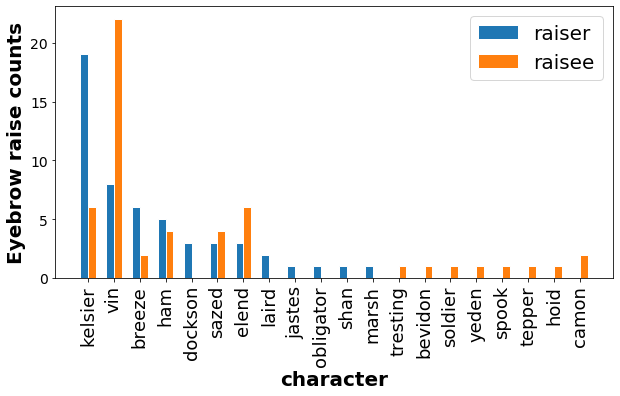

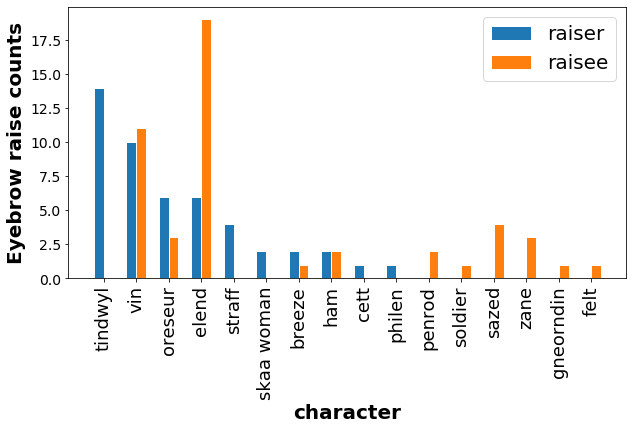

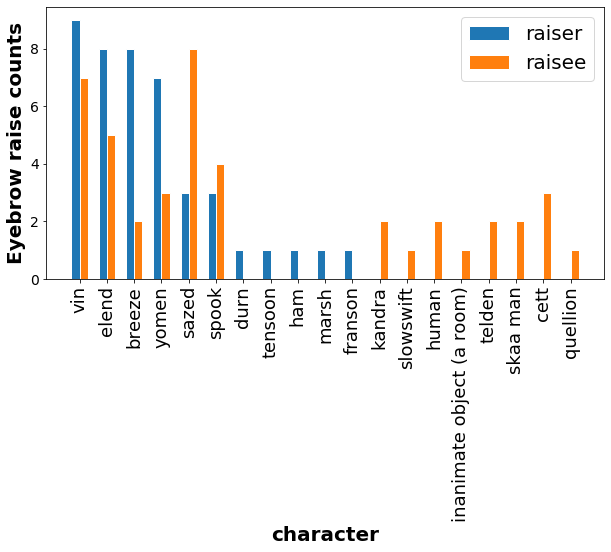

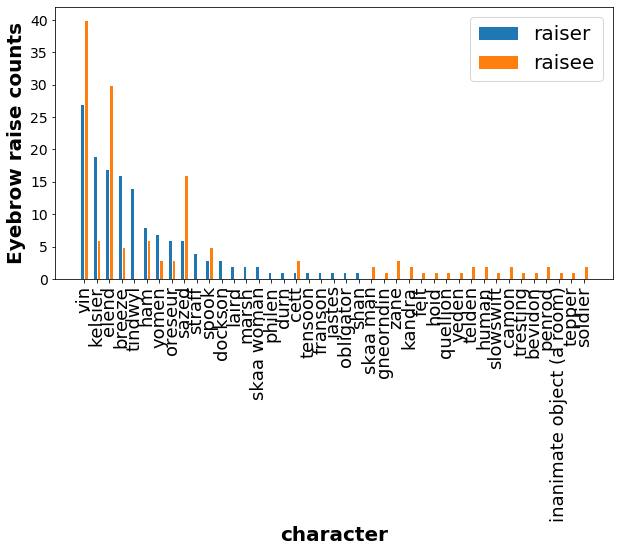

In [24]:
plot_raiser_raisee_counts(fe_raise_df)
plot_raiser_raisee_counts(wa_raise_df)
plot_raiser_raisee_counts(ha_raise_df)
plot_raiser_raisee_counts(mb_raise_df)

## Visualize as stripplot

In [25]:
fe_indiv = fe.rename(
    columns={'character':'raiser','target':'raisee'}
    ).melt(id_vars='page',
                   value_vars=['raiser','raisee'],
                   var_name = "eyebrow",       
                   value_name="character")
fe_indiv.head(10)

,page,eyebrow,character
0,2,raiser,obligator
1,8,raiser,kelsier
2,25,raiser,laird
3,26,raiser,laird
4,30,raiser,dockson
5,55,raiser,kelsier
6,55,raiser,kelsier
7,56,raiser,kelsier
8,58,raiser,kelsier
9,67,raiser,breeze


In [35]:
fe.head()

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1


In [27]:
MAIN_CHARS = ['kelsier','vin','elend','breeze','ham','sazed','dockson']
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(MAIN_CHARS,range(len(MAIN_CHARS))))



In [47]:
# Individual characters transitions between eyebrow raisers to raisees
points = alt.Chart(fe_indiv).mark_point(size=100).encode(
    x='page:Q',
    color=alt.Color('eyebrow:N'),
    y = alt.Y('character:N', sort=custom_char_sort),
).properties(
    height=500, 
    width=800
)

lines = alt.Chart(fe).mark_rule().encode(
    x = 'page:Q',
    y = alt.Y('character:N', sort=custom_char_sort),
    y2 = alt.Y2('target:N'),
)

chart = points + lines

chart.configure_axis(
    grid=False
)

alt.LayerChart(...)

In [105]:
#list_ordering = ['uMax','lowCH4','NoCu','lowCu','medCu','highCu','NO3_lowO2_slow_growth','highO2_slow_growth','lowO2_fast_growth','MeOH','NoLanthanum','WithLanthanum'] 
fe["char_order"] = pd.Categorical(fe["character"], categories=custom_char_sort)

<ipython-input-105-ec5b10475cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe["char_order"] = pd.Categorical(fe["character"], categories=custom_char_sort)


In [106]:
fe

,page,character,target,book,char_order
0,2,obligator,tresting,1,obligator
1,8,kelsier,tepper,1,kelsier
2,25,laird,camon,1,laird
3,26,laird,camon,1,laird
4,30,dockson,kelsier,1,dockson
5,55,kelsier,vin,1,kelsier
6,55,kelsier,vin,1,kelsier
7,56,kelsier,vin,1,kelsier
8,58,kelsier,vin,1,kelsier
9,67,breeze,ham,1,breeze


In [148]:
fe.sort_values('char_order')


,page,character,target,book,char_order
0,2,obligator,tresting,1,obligator
2,25,laird,camon,1,laird
3,26,laird,camon,1,laird
47,443,dockson,kelsier,1,dockson
52,608,dockson,soldier,1,dockson
4,30,dockson,kelsier,1,dockson
5,55,kelsier,vin,1,kelsier
1,8,kelsier,tepper,1,kelsier
43,348,kelsier,ham,1,kelsier
40,329,kelsier,vin,1,kelsier


In [146]:
custom_char_sort

['obligator',
 'tresting',
 'laird',
 'camon',
 'tepper',
 'soldier',
 'yeden',
 'dockson',
 'spook',
 'kelsier',
 'vin',
 'elend',
 'sazed',
 'breeze',
 'ham',
 'bevidonk',
 'hoid',
 'marsh',
 'jastes',
 'shan']

In [184]:
# Individual characters transitions between eyebrow raisers to raisees



raisers = alt.Chart(fe).mark_point(size=200,shape='diamond',filled=True).encode(
    x='page:Q',
    #color=alt.value('blue'),
    y = alt.Y('character:N', sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    
    
)

raisees = raisers.mark_point().encode(
    x='page:Q',
    #color=alt.value('orange'),
    y = alt.Y('target:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),# sort=custom_char_sort),
    
)


lines = raisers.mark_rule().encode(
    x = 'page:Q',
    y = alt.Y('character:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    y2 = alt.Y2('target:N'),
    opacity = alt.value(0.15)
)


chart =  lines + raisers + raisees 

chart.configure_axis(
    grid=False
).properties(
    height=500, 
    width=800
)

alt.LayerChart(...)

In [250]:
highlight = alt.selection_multi( on='mouseover',
                          fields=['character'], nearest=True)


raisers = alt.Chart(fe).mark_point(shape='diamond',filled=True).encode(
    x='page:Q',
    color='character:N',
    y = alt.Y('character:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    tooltip=['character:N','target:N','page:Q'],
    size=alt.condition(highlight, alt.value(100), alt.value(50))
)


raisees = raisers.mark_point().encode(
    x='page:Q',
    #color=alt.value('orange'),
    y = alt.Y('target:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),# sort=custom_char_sort),
    tooltip=['character:N','target:N','page:Q'],
    size=alt.condition(highlight, alt.value(100), alt.value(50))
)


lines = alt.Chart(fe).mark_rule().encode(
    x = 'page:Q',
    y = alt.Y('character:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    y2 = alt.Y2('target:N'),
    color='character:N',
    tooltip=['character:N','target:N','page:Q'],
    opacity = alt.value(0.35),
    size=alt.condition(highlight, alt.value(3), alt.value(1))
).add_selection(
    highlight
)

chart =  lines + raisers + raisees 

chart.configure_axis(
    grid=False
).properties(
    height=500, 
    width=800
)

alt.LayerChart(...)

In [269]:
raisers = alt.Chart(fe).mark_point(shape='diamond',filled=True,size=200).encode(
    x='page:Q',
    color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
    y = alt.Y('character:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    tooltip=['character:N','target:N','page:Q'],
)


raisees = raisers.mark_point().encode(
    x='page:Q',
    #color=alt.value('orange'),
    y = alt.Y('target:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),# sort=custom_char_sort),
    tooltip=['character:N','target:N','page:Q'],
)


lines = alt.Chart(fe).mark_rule().encode(
    x = 'page:Q',
    y = alt.Y('character:N',sort=alt.EncodingSortField(field='char_order',op='count',order='descending')),
    y2 = alt.Y2('target:N'),
    color='character:N',
    tooltip=['character:N','target:N','page:Q'],
    opacity = alt.value(0.5),
)

chart =  lines + raisers + raisees 

chart.configure_axis(
    grid=False
).properties(
    height=500, 
    width=800
)

alt.LayerChart(...)

In [274]:
raisers = alt.Chart(fe.sort_values('char_order')).mark_point(shape='diamond',filled=True,size=200).encode(
    x='page:Q',
    color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
    y = alt.Y('character:N',sort=None),
    tooltip=['character:N','target:N','page:Q'],
)


raisees = raisers.mark_point().encode(
    x='page:Q',
    #color=alt.value('orange'),
    y = alt.Y('target:N',sort=None),
    tooltip=['character:N','target:N','page:Q'],
)


lines = alt.Chart(fe.sort_values('char_order')).mark_rule().encode(
    x = 'page:Q',
    y = alt.Y('character:N',sort=None),
    y2 = alt.Y2('target:N'),
    color='character:N',
    tooltip=['character:N','target:N','page:Q'],
    opacity = alt.value(0.5),
)

chart =  lines + raisers + raisees 

chart.configure_axis(
    grid=False
).properties(
    height=500, 
    width=800
)


alt.LayerChart(...)

## melt the df to have source/target as a column, 

In [428]:
custom_char_sort = [
    'kelsier',
    'dockson',
    'breeze',
    'ham',
    'sazed',
    'marsh',
    'spook',
    'yeden',
    'vin',
    'hoid',
    'camon',
    'tepper',
    'soldier',
    'bevidon',
    'elend',
    'jastes',
    'shan',
    'laird',
    'obligator',
    'tresting',
]



In [429]:
def create_altair_plot_df(df):
    '''
    Given a dataframe, melt and remerge it for altair plotting on a certain sort order
    '''
    # add index as a column
    df2 = df.assign(idx=df.index)
    # melt, use character_draw
    df_melt = df2.melt(id_vars=['idx'],
                       value_vars=['character','target'],
                       var_name = "eyebrow",       
                       value_name="character_draw")
    
    # merge melted df back to orignal source/target df
    df3 = df_melt.merge(df2,on='idx')
    # add a sort column on character draw
    df3["char_order"] = pd.Categorical(df3["character_draw"], categories=custom_char_sort)
    
    return df3



In [430]:
fe_alt = create_altair_plot_df(fe)
fe_alt.head(10)

,idx,eyebrow,character_draw,page,character,target,book,char_order
0,0,character,obligator,2,obligator,tresting,1,obligator
1,0,target,tresting,2,obligator,tresting,1,tresting
2,1,character,kelsier,8,kelsier,tepper,1,kelsier
3,1,target,tepper,8,kelsier,tepper,1,tepper
4,2,character,laird,25,laird,camon,1,laird
5,2,target,camon,25,laird,camon,1,camon
6,3,character,laird,26,laird,camon,1,laird
7,3,target,camon,26,laird,camon,1,camon
8,4,character,dockson,30,dockson,kelsier,1,dockson
9,4,target,kelsier,30,dockson,kelsier,1,kelsier


In [431]:
def plot_eyebrow_connections(df):
    '''
    Given a df formatted for altair plotting, show the eyebrow 
    raiser/raisee interactions over time
    '''
    color_scheme = 'sinebow'
    char_order_df = df.sort_values('char_order')[['character_draw']].drop_duplicates()
    
    base = alt.Chart(df.sort_values('char_order')).mark_point(size=200).encode(
        x='page:Q',
        color=alt.Color('character:N',scale=alt.Scale(scheme=color_scheme)),
        y = alt.Y('character_draw:N',sort=None),
        #shape = 'eyebrow:N',
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(0)
    )

    raisers = base.mark_point(filled=True,shape='diamond',size=200).encode(
        x='page:Q',
        #color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
        y = alt.Y('character:N',sort=None),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(1),
    )

    raisees = base.mark_point(size=200).encode(
        x='page:Q',
        #color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
        y = alt.Y('target:N',sort=None),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(1)
    )

    lines = alt.Chart(df.sort_values('char_order')).mark_rule().encode(
        x = 'page:Q',
        y = alt.Y('character:N',sort=None),
        y2 = alt.Y2('target:N'),
        color=alt.Color('character:N',scale=alt.Scale(scheme=color_scheme)),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(0.25),
    )
    
    track = alt.Chart(char_order_df).mark_rule().encode(
        y = alt.Y('character_draw:N',sort=None),
        #x = alt.X('target:N'),
        color=alt.Color('character_draw:N',scale=alt.Scale(scheme=color_scheme)),
        #tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(0.05),
        size=alt.value(15)
    )

    chart =  track + base + raisers + raisees + lines 

    chart = chart.configure_axis(
        grid=False
    ).properties(
        height=500, 
        width=800
    )
    
    return chart


In [432]:
plot_eyebrow_connections(fe_alt)

alt.LayerChart(...)

In [505]:
def plot_eyebrow_connections_int(df):
    '''
    Given a df formatted for altair plotting, show the eyebrow 
    raiser/raisee interactions over time. Interactive version
    '''
    color_scheme = 'sinebow'
    char_order_df = df.sort_values('char_order')[['character_draw']].drop_duplicates()
    
#     highlight = alt.selection(type='single', on='mouseover',
#                           fields=['character_draw'], nearest=True)
    
    highlight = alt.selection_multi( on='mouseover',
                          fields=['character_draw'], nearest=True)
    
    
    
    
    
    base = alt.Chart(df.sort_values('char_order')).mark_point().encode(
        x='page:Q',
        color=alt.Color('character:N',scale=alt.Scale(scheme=color_scheme)),
        y = alt.Y('character_draw:N',sort=None),
        #shape = 'eyebrow:N',
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(0)
    )

    raisers = base.mark_point(filled=True,shape='diamond').encode(
        x='page:Q',
        #color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
        y = alt.Y('character:N',sort=None),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(1),
        size = alt.condition(highlight,alt.value(300),alt.value(100))
    )

    raisees = base.mark_point().encode(
        x='page:Q',
        #color=alt.Color('character:N',scale=alt.Scale(scheme='category20')),
        y = alt.Y('target:N',sort=None),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.value(1),
        size = alt.condition(highlight,alt.value(500),alt.value(100))
    )
    
    
    lines = alt.Chart(df.sort_values('char_order')).mark_rule().encode(
        x = 'page:Q',
        y = alt.Y('character:N',sort=None),
        y2 = alt.Y2('target:N'),
        color=alt.Color('character:N',scale=alt.Scale(scheme=color_scheme)),
        tooltip=['character:N','target:N','page:Q'],
        opacity = alt.condition(highlight,alt.value(1),alt.value(0.15)),
        size=alt.condition(highlight,alt.value(3),alt.value(1))
    )#.add_selection(highlight2)
    
    track = alt.Chart(char_order_df).mark_rule().encode(
        y = alt.Y('character_draw:N',sort=None),
        #x = alt.X('target:N'),
        color=alt.Color('character_draw:N',scale=alt.Scale(scheme=color_scheme)),
        #tooltip=['character:N','target:N','page:Q'],
        #opacity = alt.value(0.01),
        opacity = alt.condition(highlight,alt.value(0.5),alt.value(0.05)),
        size=alt.value(15)
    ).add_selection(highlight)
    
    

    chart =  track + base + raisers + raisees + lines 

    chart = chart.configure_axis(
        grid=False
    ).properties(
        height=500, 
        width=800
    )
    
    return chart

In [506]:
plot_eyebrow_connections_int(fe_alt)

alt.LayerChart(...)

In [278]:
print(custom_char_sort)
fe.sort_values('char_order')

['obligator', 'tresting', 'laird', 'camon', 'tepper', 'soldier', 'yeden', 'dockson', 'spook', 'kelsier', 'vin', 'elend', 'sazed', 'breeze', 'ham', 'bevidonk', 'hoid', 'marsh', 'jastes', 'shan']


,page,character,target,book,char_order
0,2,obligator,tresting,1,obligator
2,25,laird,camon,1,laird
3,26,laird,camon,1,laird
47,443,dockson,kelsier,1,dockson
52,608,dockson,soldier,1,dockson
4,30,dockson,kelsier,1,dockson
5,55,kelsier,vin,1,kelsier
1,8,kelsier,tepper,1,kelsier
43,348,kelsier,ham,1,kelsier
40,329,kelsier,vin,1,kelsier


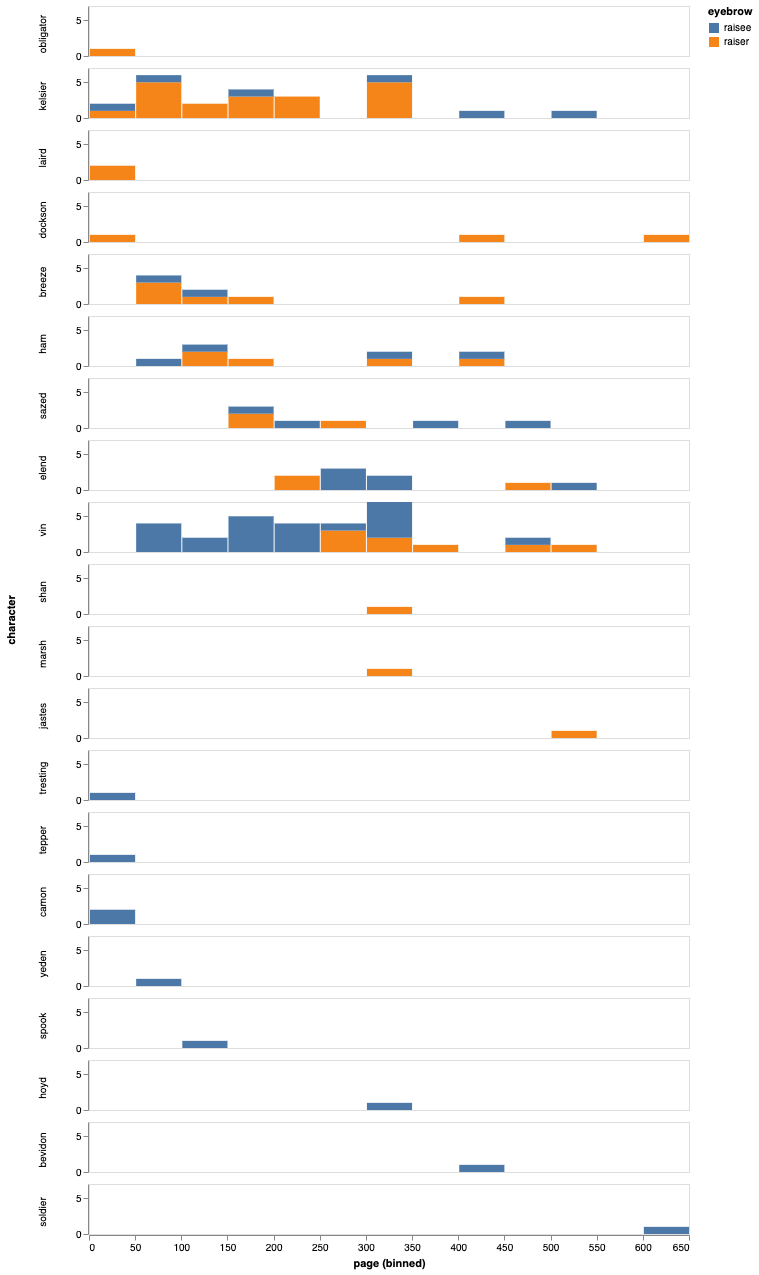

In [44]:
# Individual characters transitions between eyebrow raisers to raisees
alt.Chart(fe_indiv
).mark_bar().encode(
    x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
    y=alt.Y('count()',axis=alt.Axis(title='')),
    color=alt.Color('eyebrow:N'),
    row = alt.Row('character:N', sort=MAIN_CHARS),
).properties(
    height=50, 
    width=600
).configure_axis(
    grid=False
)


# need to update altair for this to work...

# # Individual characters transitions between eyebrow raisers to raisees
# alt.Chart(fe_indiv).transform_fold(
#     ['raiser','raisee'],
#     as_=['eyebrow:N','page:Q']
# ).mark_bar().encode(
#     x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
#     y='count()',
#     color=alt.Color('eyebrow:N'),
#     row = alt.Row('character:N', sort=MAIN_CHARS),
# ).properties(
#     height=50, 
#     width=600
# )


/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


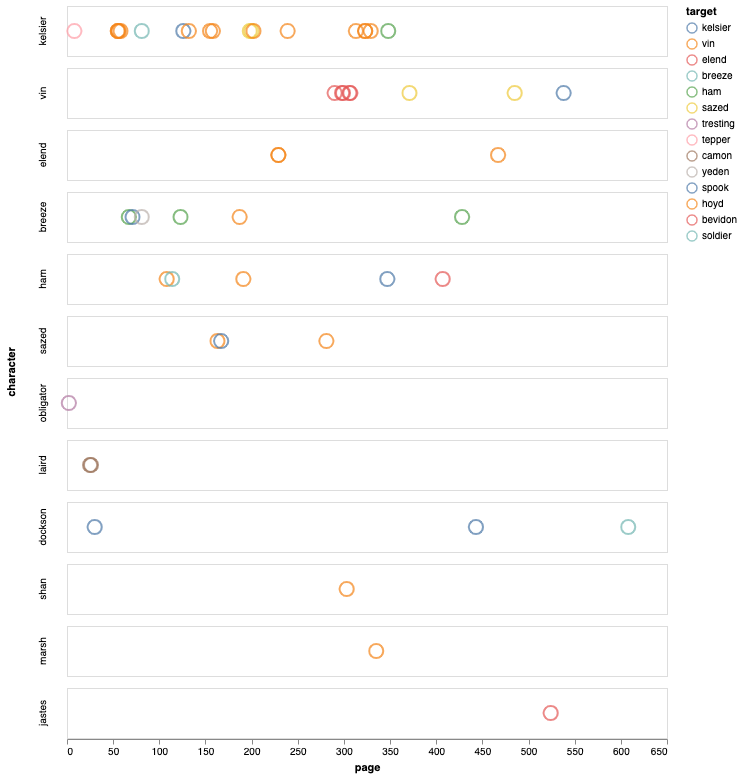

In [46]:
# Who does each character raise their eyebrows at?
alt.Chart(fe).mark_point(size=200).encode(
    x='page:Q',
    color=alt.Color('target:N', sort=MAIN_CHARS),
    row = alt.Row('character:N', sort=MAIN_CHARS),
    tooltip=['character','target'],
    #shape='target:N'
).properties(
    height=50, 
    width=600
)

/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


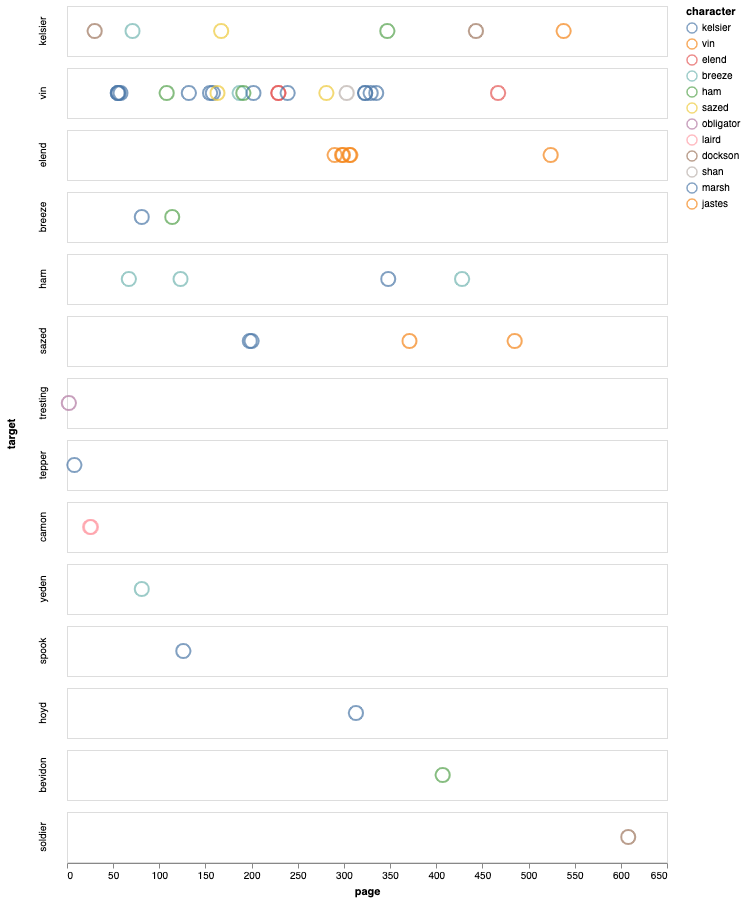

In [48]:
# Who get's eyebrows raised at them?
alt.Chart(fe).mark_point(size=200).encode(
    x='page:Q',
    color=alt.Color('character:N', sort=MAIN_CHARS),
    row = alt.Row('target:N', sort=MAIN_CHARS),
    tooltip=['character','target']
).properties(
    height=50, 
    width=600
)

## Swarm plot

In [49]:
import seaborn as sns

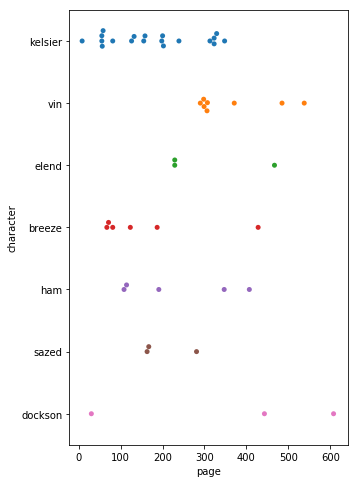

In [59]:
plt.figure(figsize=(5,8))
ax = sns.swarmplot(data=fe,
                   x="page", 
                   y="character",
                   order=MAIN_CHARS)

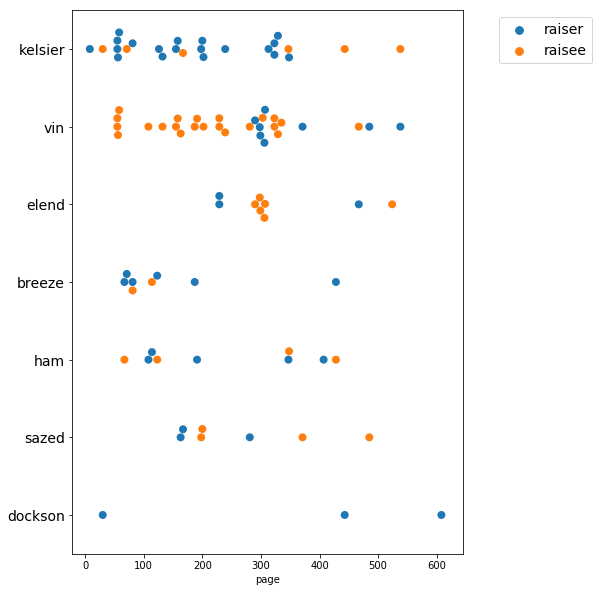

In [97]:
plt.figure(figsize=(7,10))
ax = sns.swarmplot(data=fe_indiv,
                   x="page", 
                   y="character",
                   hue='eyebrow',
                   order=MAIN_CHARS,
                   size=8)

ax.legend(fontsize=14,bbox_to_anchor=(1.35, 1), ncol=1)
plt.yticks(fontsize=14)
plt.ylabel("")

plt.show()

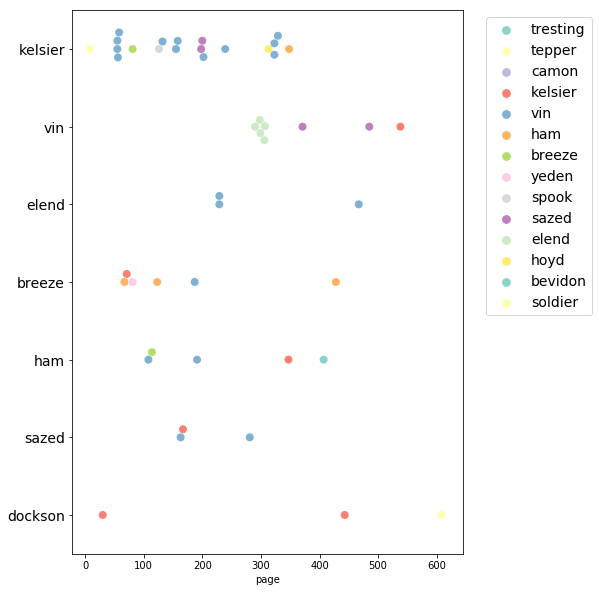

In [99]:
plt.figure(figsize=(7,10))
ax = sns.swarmplot(data=fe,
                   x="page", 
                   y="character",
                   hue='target',
                   order=MAIN_CHARS,
                   size=8,
                   palette="Set3")

ax.legend(fontsize=14,bbox_to_anchor=(1.35, 1), ncol=1)
plt.yticks(fontsize=14)
plt.ylabel("")

plt.show()

In [50]:
fe.head()

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1


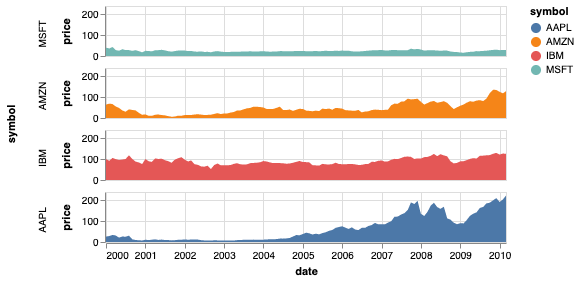

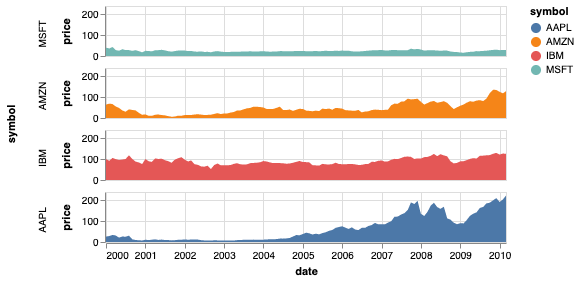

In [210]:
from vega_datasets import data

source = data.stocks()

alt.Chart(source).transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['MSFT', 'AMZN'])
).properties(height=50, width=400)

In [184]:
fe

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


## future
* swarm plot
* directed graph
* chord diagram
* landscape plot

In [28]:
# output to Json for D3
mapper = {'character':'source',0:'count'}
fe4json = fe.groupby(['character','target']).size().reset_index().rename(columns=mapper)
fe4json.head()

,source,target,count
0,breeze,ham,3
1,breeze,kelsier,1
2,breeze,vin,1
3,breeze,yeden,1
4,dockson,kelsier,2


In [31]:
fe_links = fe4json.to_json(orient='records')

In [67]:
crew = ['kelsier','dockson','breeze','ham','sazed','vin','marsh','spook']
skaa = ['camon','yeden']
nobles = ['elend','jastes','shan','tresting','tepper']
def get_mistborn_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in nobles:
        return 'nobility'
    else:
        return 'extra'

color_dict = {
    'crew':'#33a02c',
    'skaa':'#ff7f00',
    'nobility':'#6a3d9a',
    'extra':'#666'
}

In [68]:
fe_interaction_counts = Counter(fe['character'].values.tolist() + fe['target'].values.tolist())
fe_nodes = pd.DataFrame.from_dict(fe_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
fe_nodes['group'] = fe_nodes['name'].apply(lambda x: get_mistborn_group(x))
fe_nodes['color'] = fe_nodes['group'].apply(lambda x: color_dict[x])
fe_nodes


,name,count,group,color
0,obligator,1,extra,#666
1,kelsier,25,crew,#33a02c
2,laird,2,extra,#666
3,dockson,3,crew,#33a02c
4,breeze,8,crew,#33a02c
5,ham,9,crew,#33a02c
6,sazed,7,crew,#33a02c
7,elend,9,nobility,#6a3d9a
8,vin,30,crew,#33a02c
9,shan,1,nobility,#6a3d9a


In [69]:
fe_nodes.to_json(orient='records')

'[{"name":"obligator","count":1,"group":"extra","color":"#666"},{"name":"kelsier","count":25,"group":"crew","color":"#33a02c"},{"name":"laird","count":2,"group":"extra","color":"#666"},{"name":"dockson","count":3,"group":"crew","color":"#33a02c"},{"name":"breeze","count":8,"group":"crew","color":"#33a02c"},{"name":"ham","count":9,"group":"crew","color":"#33a02c"},{"name":"sazed","count":7,"group":"crew","color":"#33a02c"},{"name":"elend","count":9,"group":"nobility","color":"#6a3d9a"},{"name":"vin","count":30,"group":"crew","color":"#33a02c"},{"name":"shan","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"marsh","count":1,"group":"crew","color":"#33a02c"},{"name":"jastes","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"tresting","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"tepper","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"camon","count":2,"group":"skaa","color":"#ff7f00"},{"name":"yeden","count":1,"group":"skaa","color":"#ff7f00"},{"name":"sp

In [70]:
fe_links

'[{"source":"breeze","target":"ham","count":3},{"source":"breeze","target":"kelsier","count":1},{"source":"breeze","target":"vin","count":1},{"source":"breeze","target":"yeden","count":1},{"source":"dockson","target":"kelsier","count":2},{"source":"dockson","target":"soldier","count":1},{"source":"elend","target":"vin","count":3},{"source":"ham","target":"bevidon","count":1},{"source":"ham","target":"breeze","count":1},{"source":"ham","target":"kelsier","count":1},{"source":"ham","target":"vin","count":2},{"source":"jastes","target":"elend","count":1},{"source":"kelsier","target":"breeze","count":1},{"source":"kelsier","target":"ham","count":1},{"source":"kelsier","target":"hoyd","count":1},{"source":"kelsier","target":"sazed","count":2},{"source":"kelsier","target":"spook","count":1},{"source":"kelsier","target":"tepper","count":1},{"source":"kelsier","target":"vin","count":12},{"source":"laird","target":"camon","count":2},{"source":"marsh","target":"vin","count":1},{"source":"obligat